In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [35]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [37]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [38]:
# dropping unwanted column using drop method

df.drop('ID', axis = 1, inplace = True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


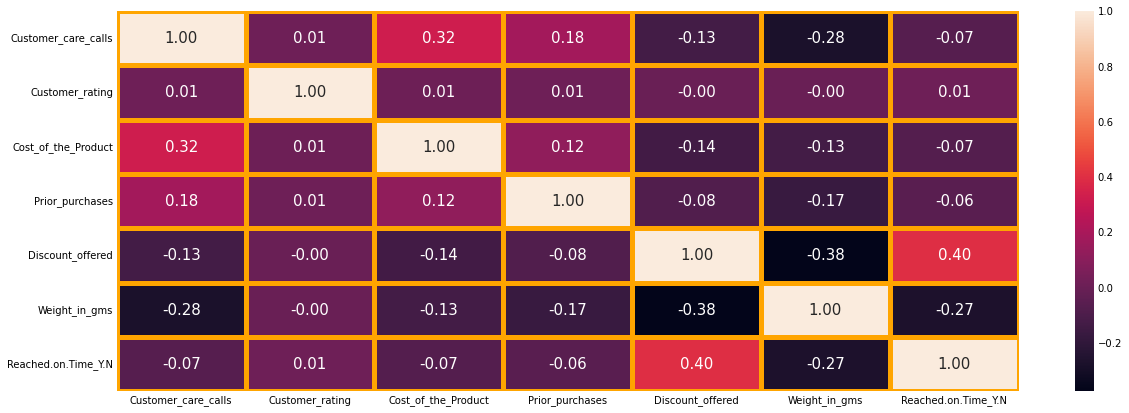

In [39]:
# heatmap of the data for checking the correlation between the features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 5, linecolor = 'orange')
plt.show()

Conclusions from Correlation matrix :-

Discount Offered have high positive correlation with Reached on Time or Not of 40%.
Weights in gram have negative correlation with Reached on Time or Not -27%.
Discount Offered and weights in grams have negative correlation -38%.
Customer care calls and weights in grams havenegative correlation -28%.
Customer care calls and cost of the product have positive correlation of 32%.
Prior Purchases and Customer care calls have slightly positive correlation.

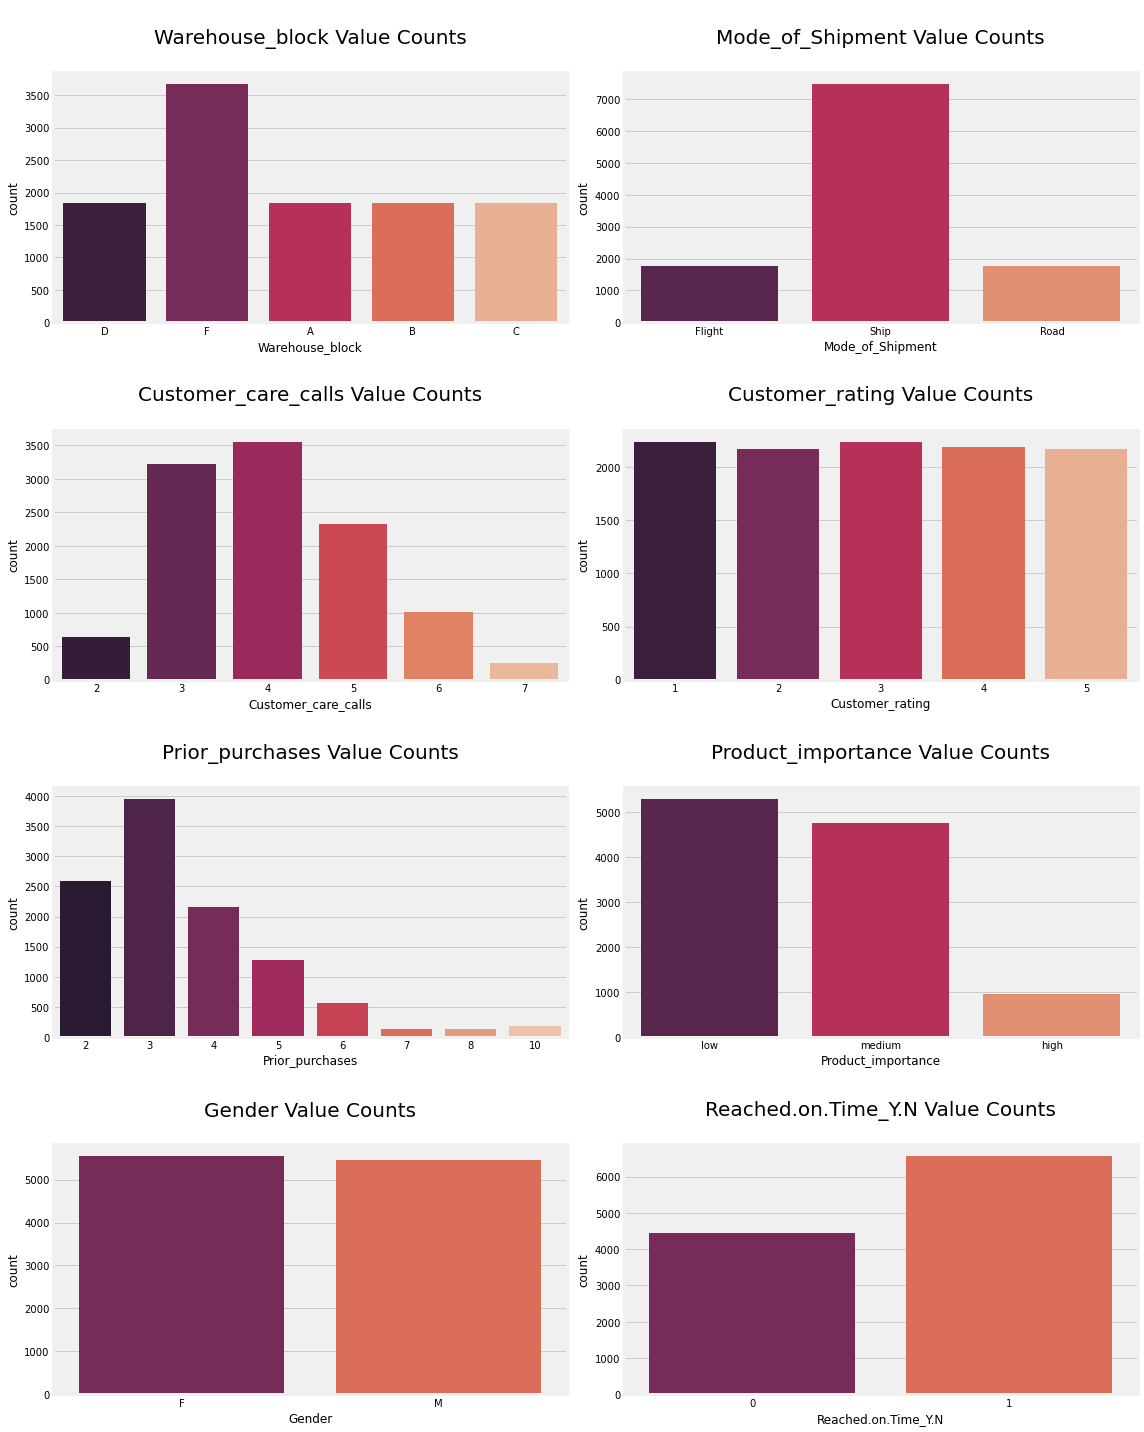

In [40]:
#Checking value counts of categorical columns

# here by these plots we are lookin at the counts of each categories in the categorical columns
# creating a list of categorical coumns
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (16, 20))
plotnumber = 1

# plotting the countplot of each categorical column.

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

From the above plots, we can conclude following:-

Warehouse block F have has more values than all other Warehouse blocks.
In mode of shipment columns we can clearly see that ship delivers the most of products to the customers.
Most of the customers calls 3 or 4 times to the customer care centers.
Customer Ratings does not have much variation.
Most of the customers have 3 prior purchases.
We can say that mopst of the products are of low Importance.
Gender Column doesn't have much variance.
More products doesn't reach on time than products reached on time.

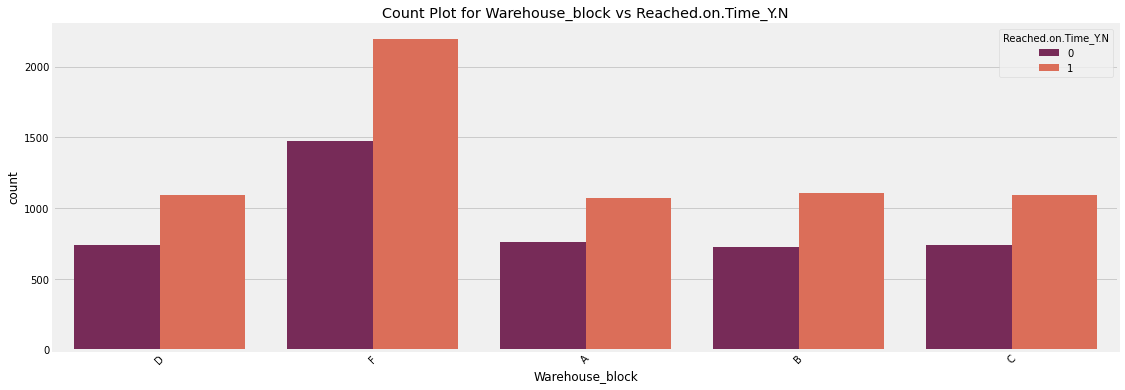

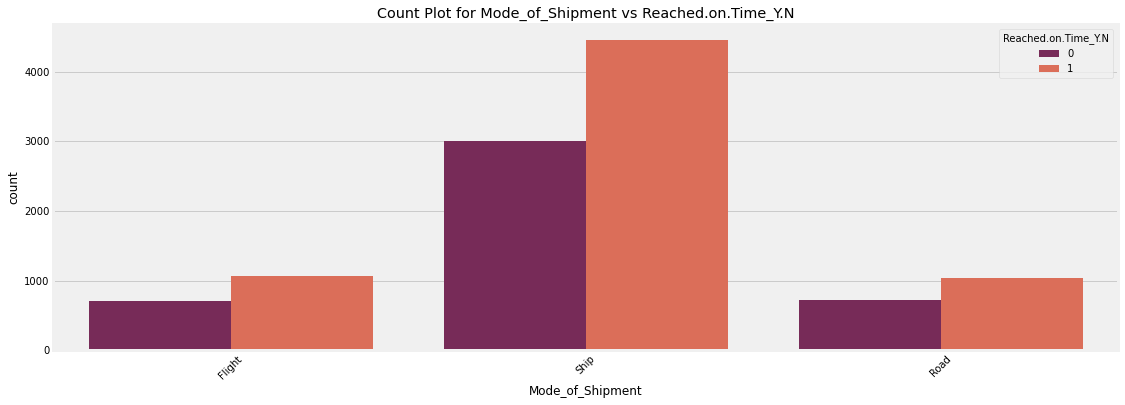

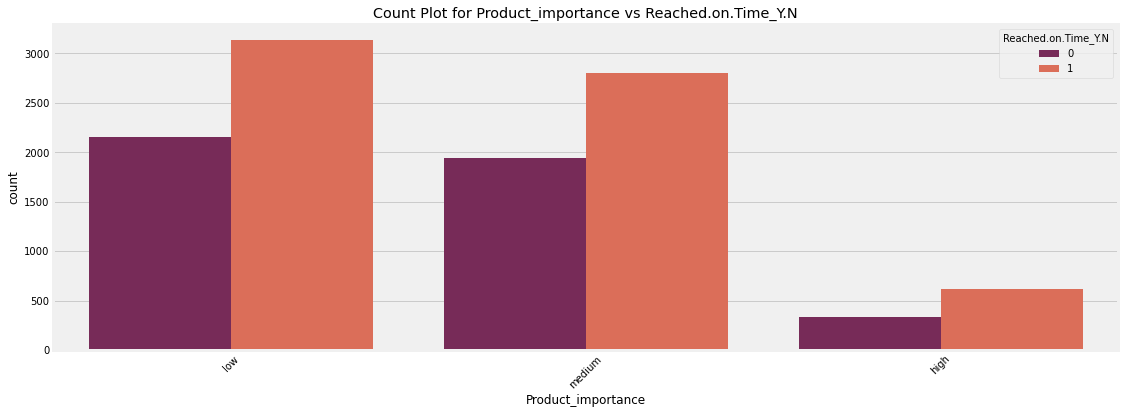

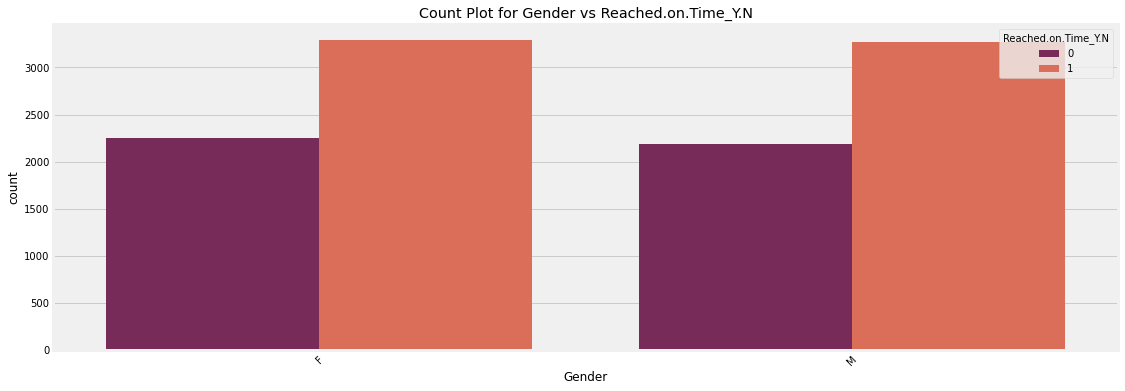

In [41]:
## making a countplot of each categories in the categorical columns and see the effect of Reached on time or not .

# Selecting only categorical columns
categorical_columns = df.select_dtypes(include=['object'])
for column in categorical_columns:
    plt.figure(figsize=(17, 6))  # Adjust size as needed
    sns.countplot(x=column, hue='Reached.on.Time_Y.N', data=df, palette='rocket')
    plt.title(f'Count Plot for {column} vs Reached.on.Time_Y.N')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
    plt.legend(title='Reached.on.Time_Y.N', loc='upper right')
    plt.show()

In [42]:

integer_columns = df.select_dtypes(include = ['int64'])
integer_columns.drop('Reached.on.Time_Y.N', axis = 1, inplace = True)
integer_columns.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,4,2,177,3,44,1233
1,4,5,216,2,59,3088
2,2,2,183,4,48,3374
3,3,3,176,4,10,1177
4,2,2,184,3,46,2484


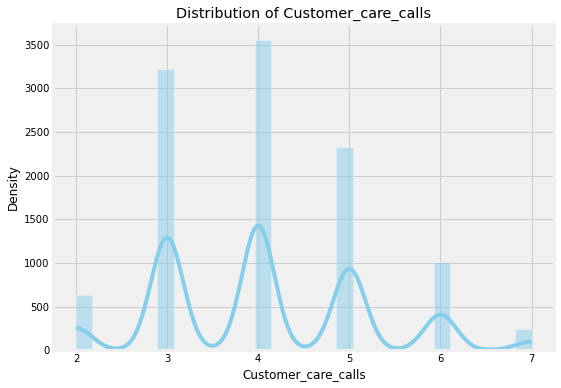

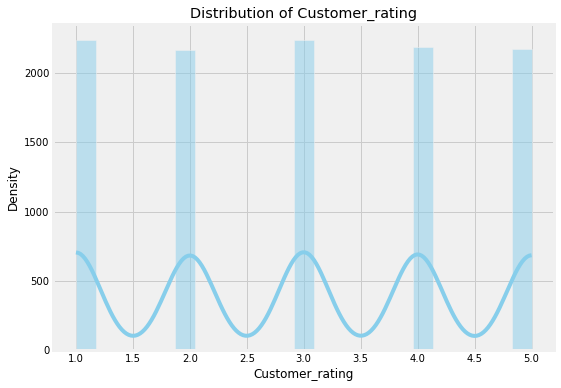

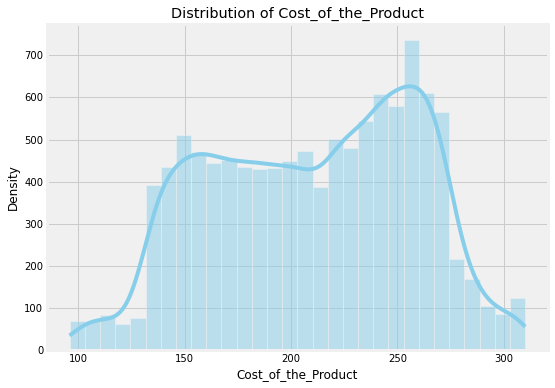

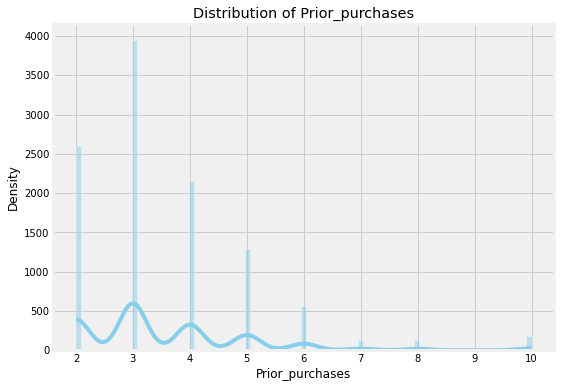

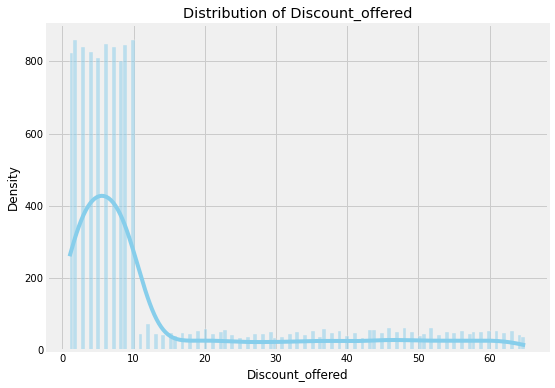

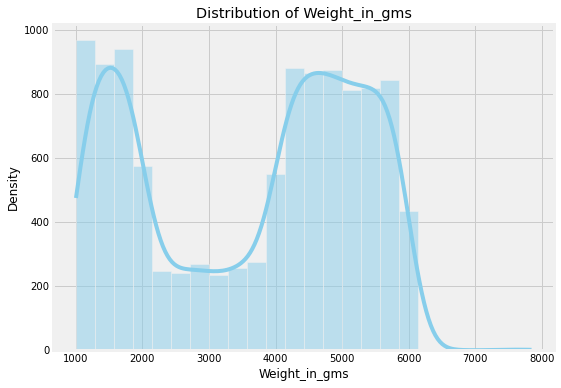

In [43]:
for column in integer_columns:
    plt.figure(figsize=(8, 6))  # Adjust size as needed
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

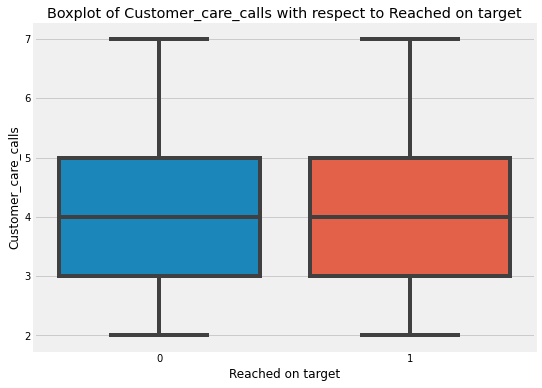

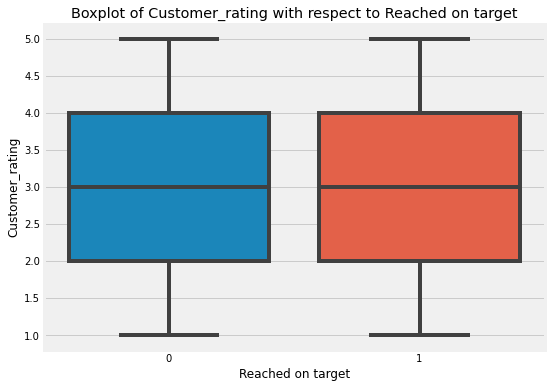

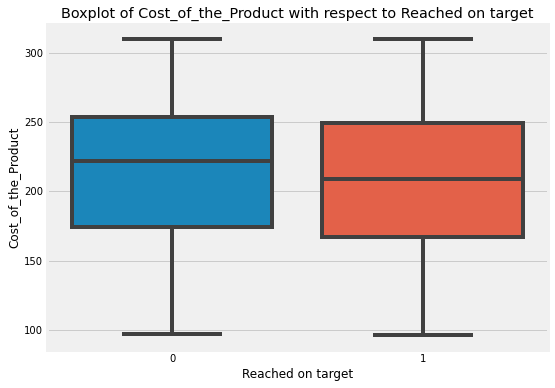

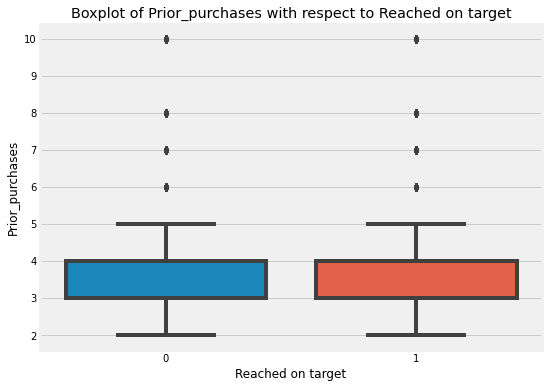

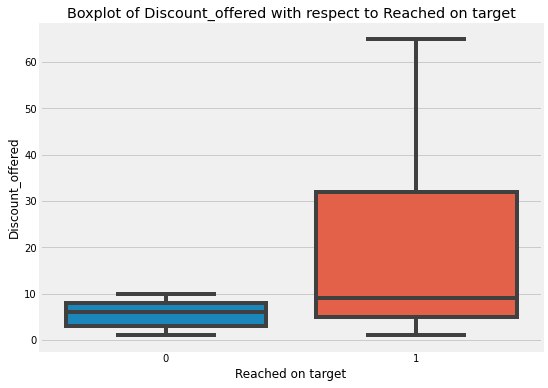

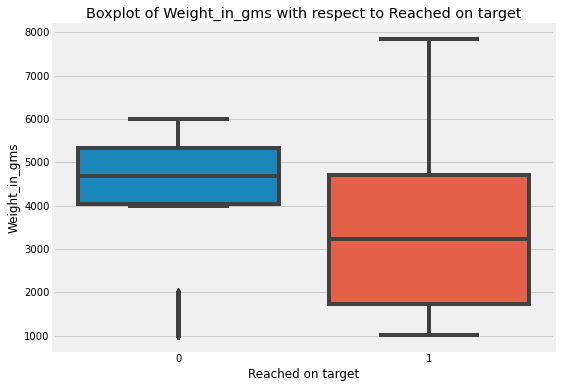

In [44]:
for column in integer_columns:
    plt.figure(figsize=(8, 6))  # Adjust size as needed
    sns.boxplot(x='Reached.on.Time_Y.N', y=column, data=df)
    plt.title(f'Boxplot of {column} with respect to Reached on target')
    plt.xlabel('Reached on target')
    plt.ylabel(column)
    plt.show()

In [45]:

df['Warehouse_block'] = df['Warehouse_block'].map({'A' : 0, 'B': 1, 'C': 2, 'D':3, 'F': 4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight' : 0, 'Ship': 1, 'Road': 2})
df['Product_importance'] = df['Product_importance'].map({'low' : 0, 'medium': 1, 'high': 2})
df['Gender'] = df['Gender'].apply(lambda val: 1 if val == 'M' else 0)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,0,0,44,1233,1
1,4,0,4,5,216,2,0,1,59,3088,1
2,0,0,2,2,183,4,0,1,48,3374,1
3,1,0,3,3,176,4,1,1,10,1177,1
4,2,0,2,2,184,3,1,0,46,2484,1


In [46]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [47]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False returns RMSE

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)



Mean Absolute Error (MAE): 0.37148556007546457


These metrics will give you an idea of how well your XGBRegressor model is performing. Lower values of MAE indicate better performance